In [1]:
import numpy as np
import pandas as pd
from IPython.display import Image

# Part 2. 데이터 전처리

## 2-1 데이터 분할

In [2]:
# Scikit-learn에서 제공하는 Iris 데이터셋을 불러오기
from sklearn.datasets import load_iris
dataset = load_iris()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
# X는 feature, y는 target
X = dataset.data
y = dataset.target
target_names = dataset.target_names
feature_names = dataset.feature_names

In [4]:
# X와 y의 shape 확인
print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (150, 4)
y shape: (150,)


In [5]:
# target 이름과 class distribution 확인
print('target names:', target_names)
print('class distribution:', np.unique(y, return_counts=True))

target names: ['setosa' 'versicolor' 'virginica']
class distribution: (array([0, 1, 2]), array([50, 50, 50], dtype=int64))


In [6]:
# 첫 5개의 데이터를 출력
X[:5], y[:5]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]),
 array([0, 0, 0, 0, 0]))

### Train, Test 데이터 분할

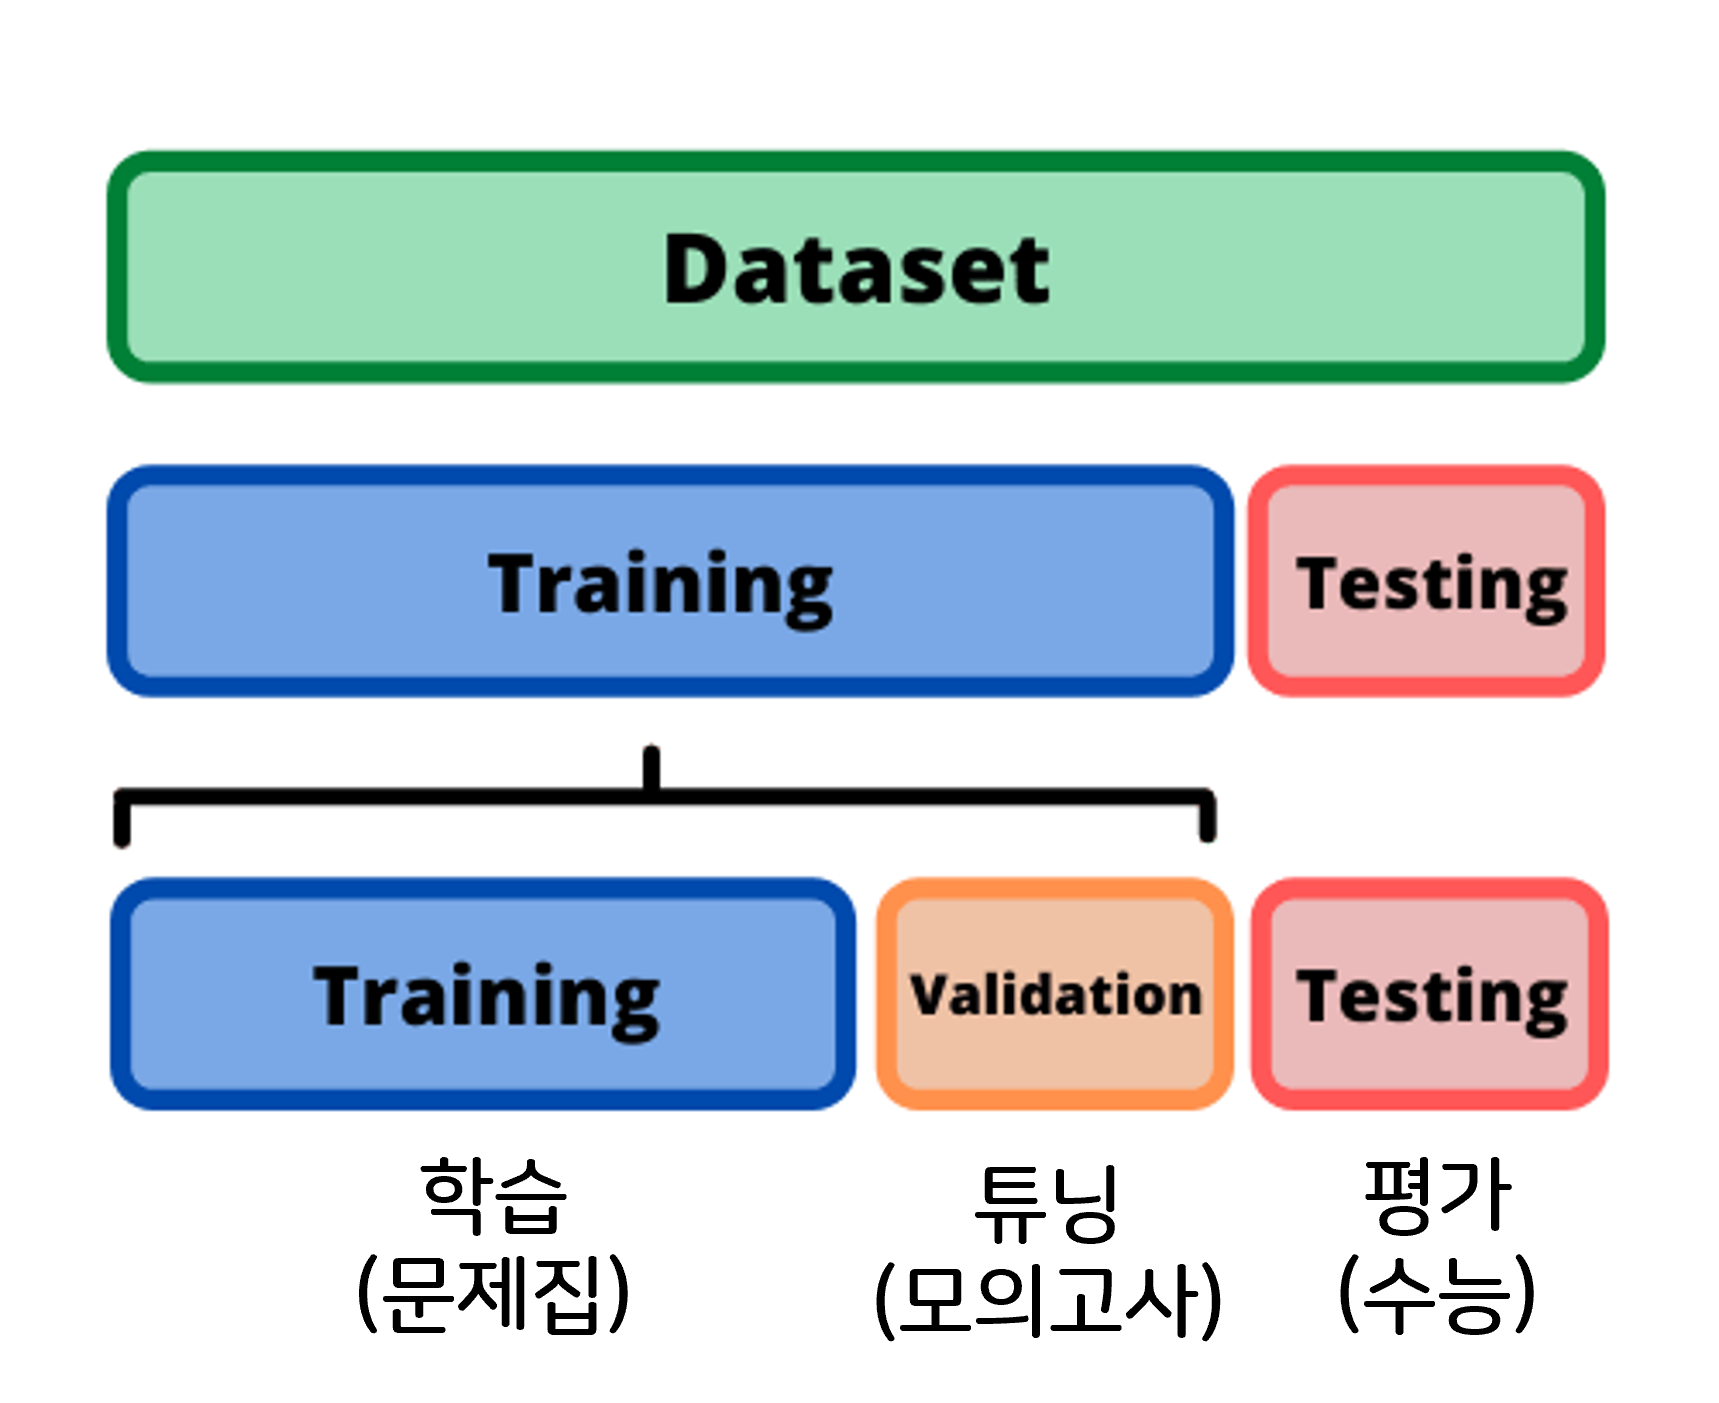

In [7]:
Image('./img/data_split.png', width=500)

In [8]:
# train_test_split 함수를 사용하여 데이터를 분리
from sklearn.model_selection import train_test_split

# test_size=0.2는 전체 데이터의 20%를 test set으로 사용하겠다는 의미
# random_state=0은 random seed를 0으로 설정하겠다는 의미
# random seed를 설정하면 항상 같은 데이터셋이 나오므로, 결과를 재현할 수 있음

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
# train set과 test set의 shape 확인
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)

print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (120, 4)
y_train shape: (120,)
X_test shape: (30, 4)
y_test shape: (30,)


In [10]:
# train set과 class distribution 확인
print('y_train class distribution:', np.unique(y_train, return_counts=True)[1])

# train set의 기대 class distribution
print('expected class distribution:', np.unique(y, return_counts=True)[1] * 0.8)

y_train class distribution: [39 37 44]
expected class distribution: [40. 40. 40.]


In [11]:
# 실제 class distribution과 기대 class distribution이 다르다는 것을 확인할 수 있음
# 이는 train set과 test set이 골고루 분리되지 않았기 때문
# 이를 해결하기 위해 stratified split을 사용

# Stratified split
## stratify는 class를 골고루 섞어서 split하겠다는 의미
## stratify={target}은 target을 기준으로 stratify하겠다는 의미 (Split 하려는 대상과 동일한 shape를 가져야 함)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [12]:
# train set과 class distribution 확인
print('y_train class distribution:', np.unique(y_train, return_counts=True)[1])

# train set의 기대 class distribution
print('expected class distribution:', np.unique(y, return_counts=True)[1] * 0.8)

## Stratified split을 통해 train set과 test set이 타겟 분포를 고려하여 골고루 분리되었음을 확인할 수 있음

y_train class distribution: [40 40 40]
expected class distribution: [40. 40. 40.]


In [13]:
# Train set과 train set과 validation set으로 분리 (8:1:1)
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=1/9, random_state=0)

In [14]:
# train set, validation set, test set의 shape 확인
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)

print('X_val shape:', X_val.shape)
print('y_val shape:', y_val.shape)

print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (120, 4)
y_train shape: (120,)
X_val shape: (15, 4)
y_val shape: (15,)
X_test shape: (15, 4)
y_test shape: (15,)


### Cross Validation

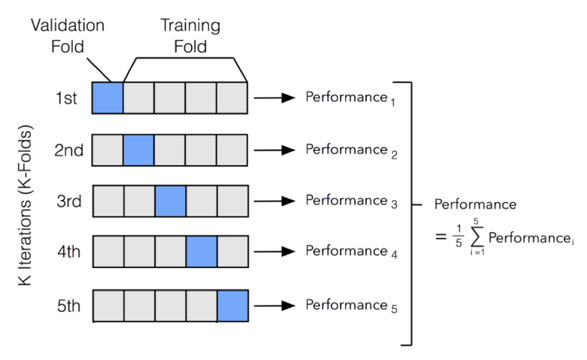

In [15]:
Image('./img/k-fold.png', width=500)

In [16]:
# Cross-validation
from sklearn.model_selection import KFold

# Create a KFold object with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# Iterate through splits
X_split_list, y_split_list = [], []
for train_index, val_index in kf.split(X):
    print("TRAIN:", train_index[:10], "VAL:", val_index[:10], 'class distribution:', np.unique(y[train_index], return_counts=True)[1])
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    X_split_list.append((X_train, X_val))
    y_split_list.append((y_train, y_val))


TRAIN: [ 0  1  2  3  4  5  6  9 10 11] VAL: [ 7  8 16 22 24 26 33 37 40 44] class distribution: [39 37 44]
TRAIN: [ 0  1  3  4  5  6  7  8  9 11] VAL: [ 2 10 18 27 43 50 56 59 60 61] class distribution: [45 40 35]
TRAIN: [ 0  1  2  4  5  7  8  9 10 14] VAL: [ 3  6 11 12 13 15 20 30 46 48] class distribution: [40 40 40]
TRAIN: [ 2  3  6  7  8  9 10 11 12 13] VAL: [ 0  1  4  5 17 23 28 31 32 34] class distribution: [36 44 40]
TRAIN: [ 0  1  2  3  4  5  6  7  8 10] VAL: [ 9 14 19 21 25 29 36 39 47 49] class distribution: [40 39 41]


In [17]:
# Cross-validation with stratification
from sklearn.model_selection import StratifiedKFold

# Create a KFold object with 5 splits
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Iterate through splits
X_split_list, y_split_list = [], []
for train_index, val_index in skf.split(X, y):
    print("TRAIN:", train_index[:10], "VAL:", val_index[:10], 'class distribution:', np.unique(y[train_index], return_counts=True)[1])
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    X_split_list.append((X_train, X_val))
    y_split_list.append((y_train, y_val))


TRAIN: [ 0  1  2  3  5  6  7  8 10 11] VAL: [ 4  9 15 27 30 34 38 43 46 47] class distribution: [40 40 40]
TRAIN: [ 0  3  4  5  6  7  8  9 10 11] VAL: [ 1  2 14 16 20 23 28 31 35 42] class distribution: [40 40 40]
TRAIN: [ 1  2  3  4  6  7  9 10 11 13] VAL: [ 0  5  8 12 19 25 29 37 39 41] class distribution: [40 40 40]
TRAIN: [ 0  1  2  3  4  5  8  9 12 14] VAL: [ 6  7 10 11 13 21 22 36 40 44] class distribution: [40 40 40]
TRAIN: [ 0  1  2  4  5  6  7  8  9 10] VAL: [ 3 17 18 24 26 32 33 45 48 49] class distribution: [40 40 40]


## 2-2 스케일링

#### 특성 스케일링
- 대부분의 ML 모델들은 입력 특성의 분포가 normal/balanced 함을 가정함
- 몇몇의 ML 모델들은 입력 특성의 스케일에 민감함
    - Ex) 키: 150\~170cm, 소득: 2000만원~10000만원  


<span style='color: red'>- **중요! 스케일링 할 때, 꼭 학습 데이터로만 fit 해야 함**
- 스케일링에 사용되는 통계량에 모델 검증을 위한 validation이나 최종 평가를 위한 test 데이터의 정보가 유출되면 안됨

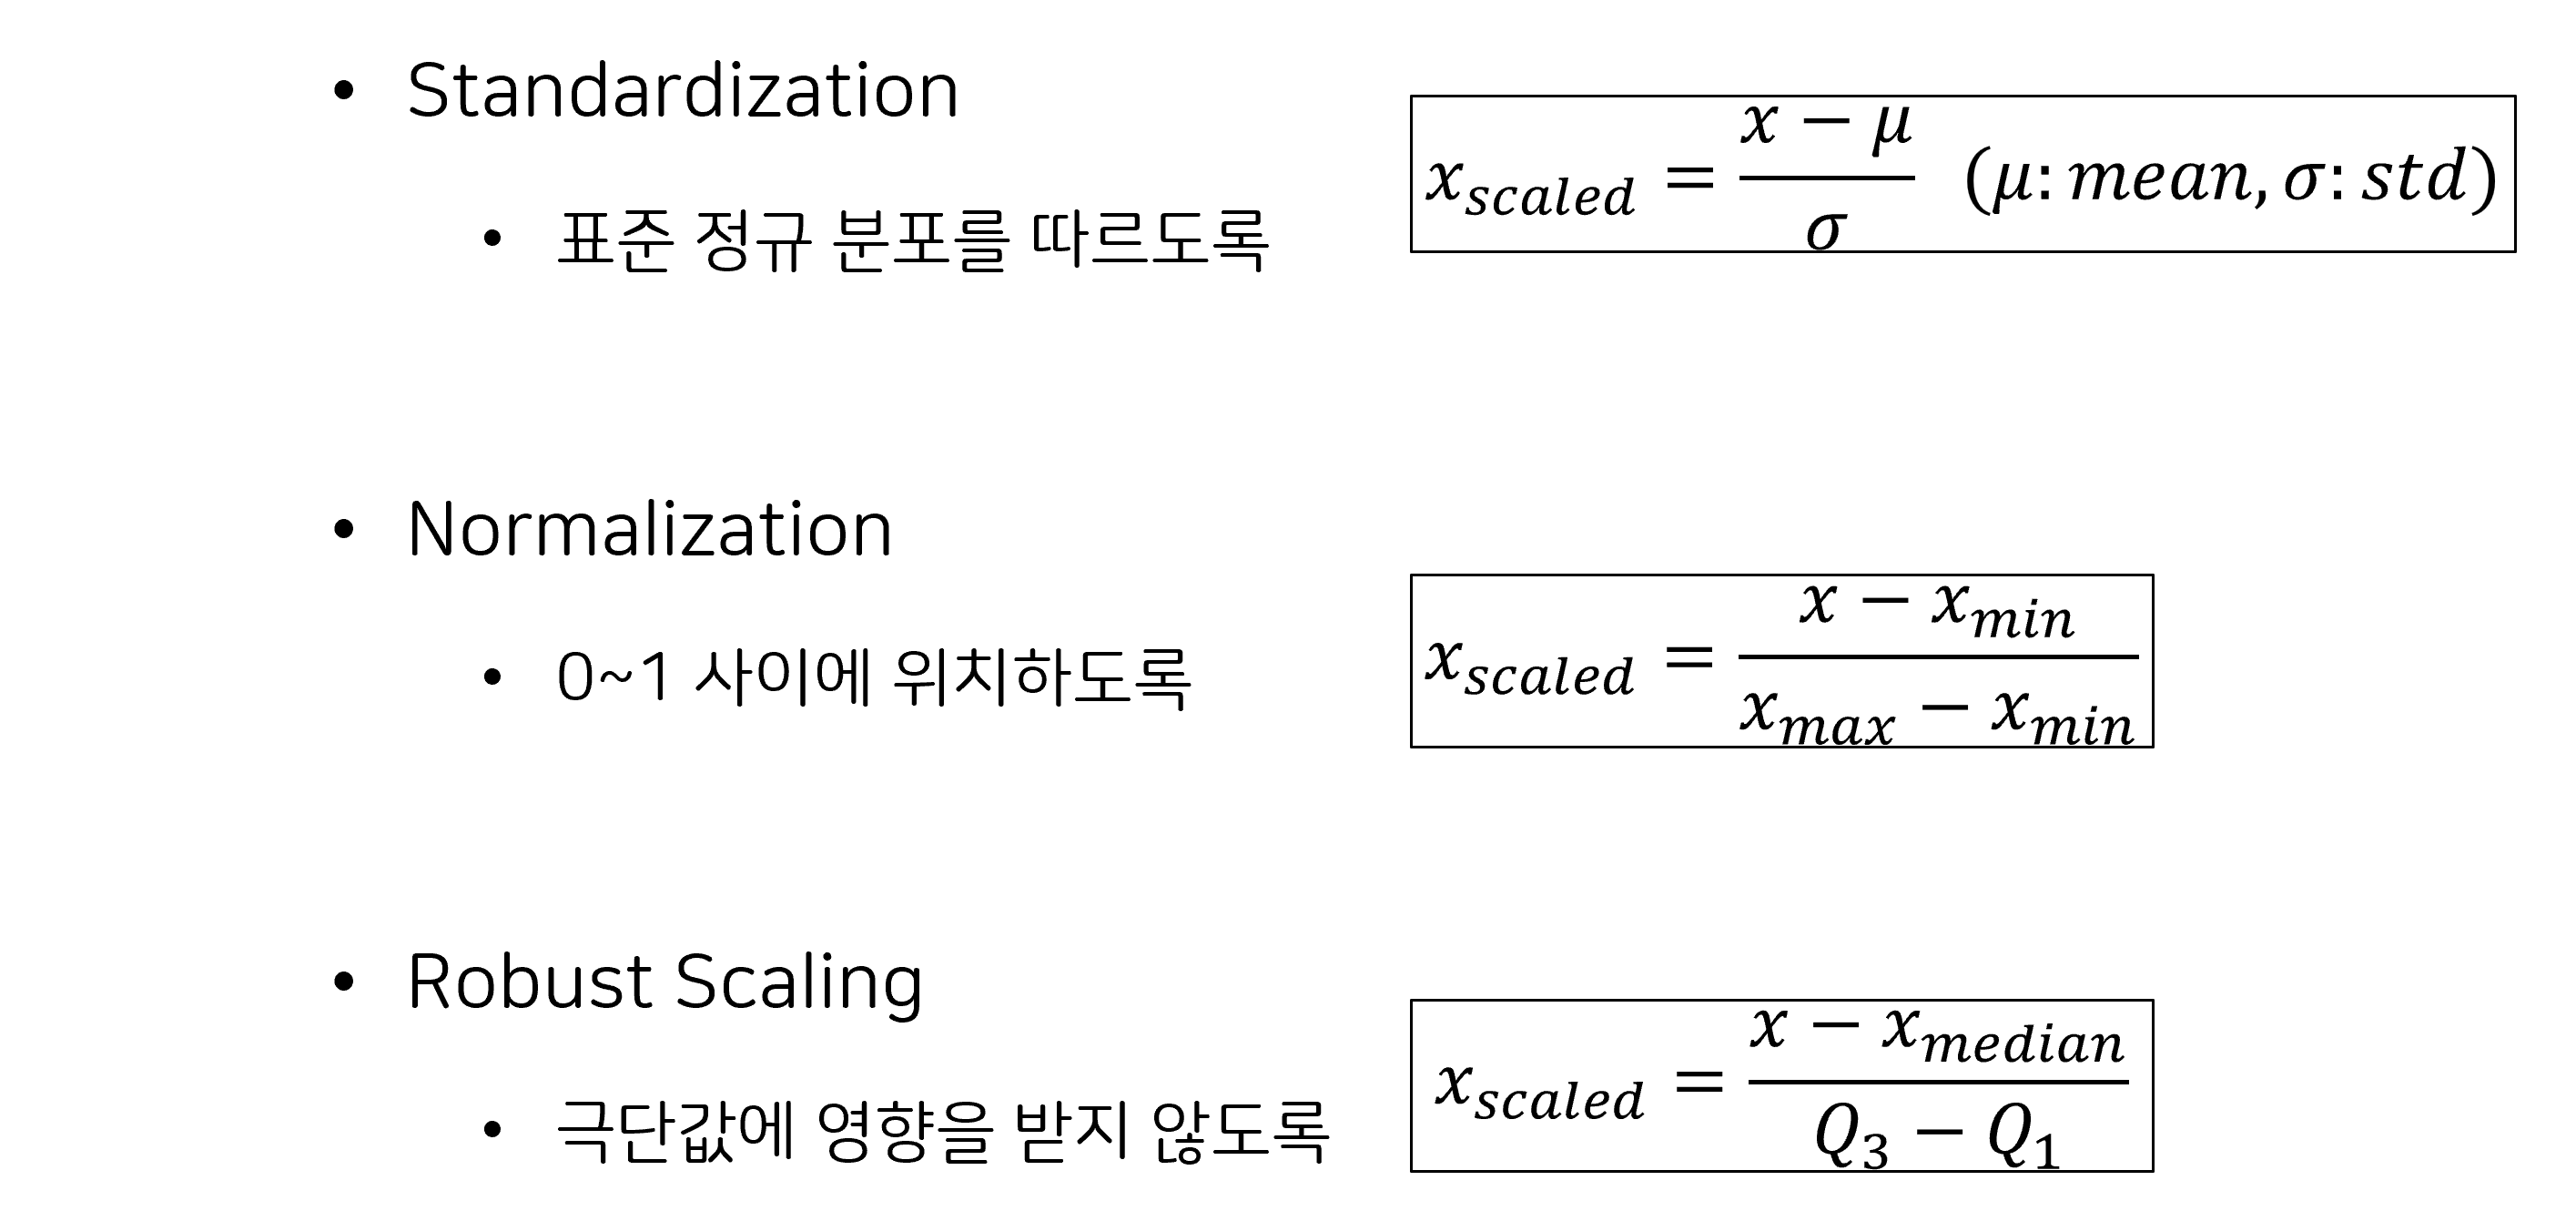

In [18]:
Image('./img/scaling.png', width=700)

In [19]:
# 첫 5개의 데이터(X)를 출력
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [20]:
# 원본 특성의 분포를 확인
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 4, figsize=(12, 3))
for i in range(4):
    ax[i].hist(X_train[:, i])
    ax[i].set_title(dataset.feature_names[i])
plt.suptitle('Feature distributions (Original)')
plt.tight_layout()
plt.show()

<Figure size 1200x300 with 4 Axes>

In [21]:
# 특성의 주요 통계량 확인 (mean, std, min, max)
print('X mean:', X.mean(axis=0))
print('X std:', X.std(axis=0))
print('X min:', X.min(axis=0))
print('X max:', X.max(axis=0))

X mean: [5.84333333 3.05733333 3.758      1.19933333]
X std: [0.82530129 0.43441097 1.75940407 0.75969263]
X min: [4.3 2.  1.  0.1]
X max: [7.9 4.4 6.9 2.5]


In [22]:
# Standard scaler with sklearn (StandardScaler)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [23]:
# scaler.fit은 데이터의 특성별 통계량을 계산하여 저장하는 역할
# scaler.transform은 저장된 통계량을 사용하여 데이터를 변환하는 역할
print('특성별 평균', scaler.mean_)
print('특성별 분산', scaler.var_)

특성별 평균 [5.88166667 3.06       3.79416667 1.21166667]
특성별 분산 [0.72933056 0.17506667 3.18754931 0.58403056]


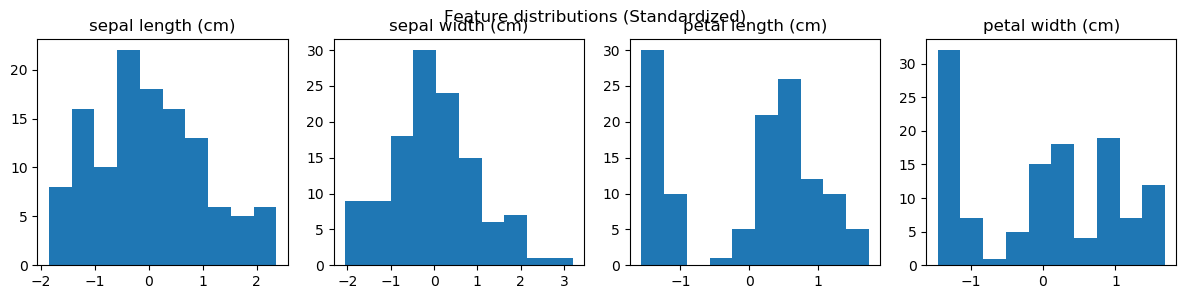

In [24]:
# 스케일링 후 데이터의 분포 확인
fig, ax = plt.subplots(1, 4, figsize=(12, 3))
for i in range(4):
    ax[i].hist(X_train_scaled[:, i])
    ax[i].set_title(dataset.feature_names[i])
plt.suptitle('Feature distributions (Standardized)')
plt.tight_layout()
plt.show()

In [25]:
# 연습) MinMax scaler with sklearn (MinMaxScaler)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


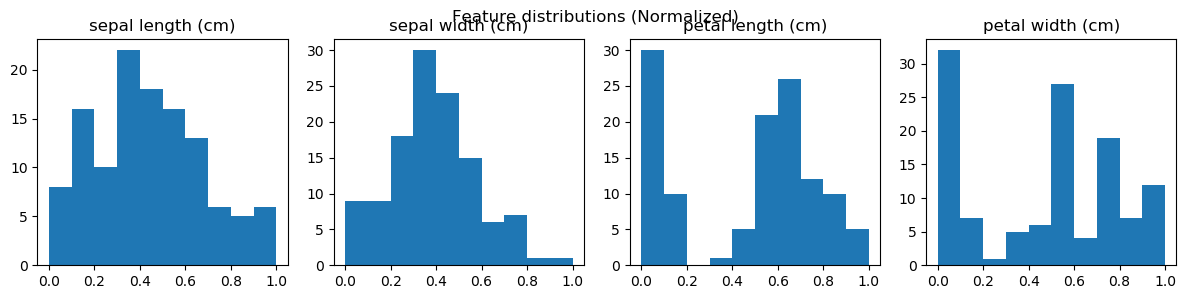

In [26]:
# 스케일링 후 데이터의 분포 확인
fig, ax = plt.subplots(1, 4, figsize=(12, 3))
for i in range(4):
    ax[i].hist(X_train_scaled[:, i])
    ax[i].set_title(dataset.feature_names[i])
plt.suptitle('Feature distributions (Normalized)')
plt.tight_layout()
plt.show()

In [27]:
# 연습) Robust scaler with sklearn (RobustScaler)
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


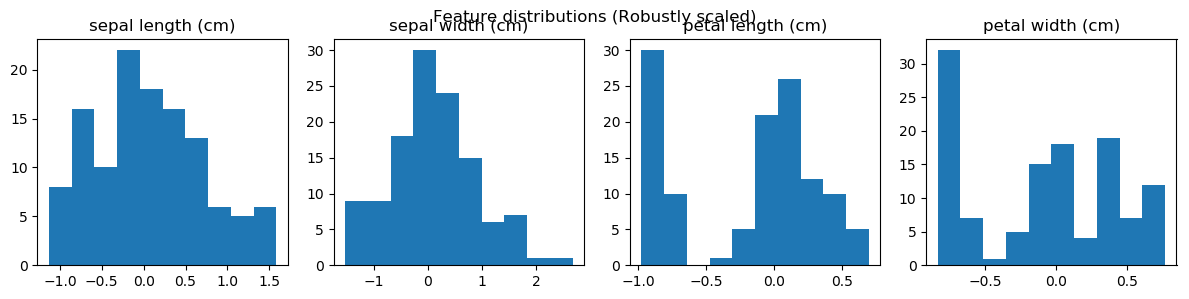

In [28]:
# 스케일링 후 데이터의 분포 확인
fig, ax = plt.subplots(1, 4, figsize=(12, 3))
for i in range(4):
    ax[i].hist(X_train_scaled[:, i])
    ax[i].set_title(dataset.feature_names[i])
plt.suptitle('Feature distributions (Robustly scaled)')
plt.tight_layout()
plt.show()

## 2-3 인코딩

### 특성 인코딩

In [29]:
# 특성 인코딩을 위한 데이터셋 로드 (전복 나이 예측)
df = pd.read_csv('data/abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [30]:
# 성별 특성의 범주 확인
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [31]:
# 범주형 변수를 수치형 변수로 변환 (pandas)
df_onehot = pd.get_dummies(df)
df_onehot

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


# Part 3. 모델링

In [32]:
# 데이터 로드 (이미 train, validation, test로 나누어져 있음)
X_train_scaled, X_val_scaled, X_test_scaled, y_train, y_val, y_test = np.load('./data/iris_scaled.npy', allow_pickle=True)

In [33]:
# 분할된 데이터셋의 크기 확인
X_train_scaled.shape, X_val_scaled.shape, X_test_scaled.shape, y_train.shape, y_val.shape, y_test.shape

((120, 4), (15, 4), (15, 4), (120,), (15,), (15,))

## 3-1 모델 정의

In [34]:
# k-NN 알고리즘
## k-NN 알고리즘은 가장 간단한 머신러닝 알고리즘 중 하나
## 새로운 데이터 포인트에 대해 예측할 때, 가장 가까운 k개의 훈련 데이터 포인트를 확인
## 이웃한 데이터 포인트가 가장 많은 클래스를 예측값으로 사용

In [35]:
# k-NN 모델 정의
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

## 3-2 모델 학습

In [36]:
# 모델 학습 (KNN)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

## 3-3 모델 평가

- 모델 평가에는 학습에 사용되지 않고, 최종 예측 데이터가 아닌 검증 데이터 (Validation set) 사용

- 다양한 방법으로 모델 평가를 할 수 있음

In [37]:
# 모델 평가 (score function)
print('train acc:', knn.score(X_train_scaled, y_train))
print('val acc:', knn.score(X_val_scaled, y_val))

train acc: 0.9583333333333334
val acc: 1.0


In [38]:
# 모델 평가 (predict function)
y_pred = knn.predict(X_val_scaled)
y_pred, y_val

(array([0, 2, 2, 2, 1, 1, 1, 2, 0, 0, 0, 2, 1, 0, 1], dtype=int64),
 array([0, 2, 2, 2, 1, 1, 1, 2, 0, 0, 0, 2, 1, 0, 1], dtype=int64))

In [39]:
# Accuracy 계산
acc = np.mean(y_pred == y_val)
acc

1.0

In [40]:
# 모델 평가 (predict_proba function)
y_pred_proba = knn.predict_proba(X_val_scaled)
y_pred_proba

array([[1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.33333333, 0.66666667],
       [0.        , 0.33333333, 0.66666667],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.66666667, 0.33333333],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ]])

In [41]:
# 확률 값이 가장 높은 클래스 선택
y_pred = np.argmax(y_pred_proba, axis=1)
y_pred, y_val

(array([0, 2, 2, 2, 1, 1, 1, 2, 0, 0, 0, 2, 1, 0, 1], dtype=int64),
 array([0, 2, 2, 2, 1, 1, 1, 2, 0, 0, 0, 2, 1, 0, 1], dtype=int64))

In [42]:
# Accuracy 계산
acc = np.mean(y_pred == y_val)
acc

1.0

## 3-4 최종 평가

In [43]:
# score function로 test set 평가
print('test acc:', knn.score(X_test_scaled, y_test))


test acc: 0.9333333333333333


In [44]:
# predict function로 test set 평가
y_pred = knn.predict(X_test_scaled)
acc = np.mean(y_pred == y_test)
print('test acc:', acc)

test acc: 0.9333333333333333


In [45]:
# predict_proba function로 test set 평가
y_pred_proba = knn.predict_proba(X_test_scaled)
y_pred = np.argmax(y_pred_proba, axis=1)
acc = np.mean(y_pred == y_test)
print('test acc:', acc)

test acc: 0.9333333333333333


In [46]:
# 예측 결과 저장
np.save('./data/iris_pred.npy', y_pred_proba)
np.save('./data/iris_true.npy', y_test)

# Part 4. 평가 지표

## 4-1 분류

### 이진 분류

In [47]:
# 이미 저장된 예측 결과 로드
y_test, y_pred = np.load('./data/binary_classification.npy', allow_pickle=True)

In [48]:
# 예측 결과, 실제 타겟 확인 (첫 10개)
y_test[:10], y_pred[:10]

(array([1., 1., 1., 0., 0., 1., 0., 1., 0., 0.]),
 array([1.        , 0.        , 0.48232344, 0.        , 0.05467145,
        0.26168185, 0.        , 0.96444769, 0.0806257 , 0.        ]))

In [49]:
# 예측 결과가 0~1 사이의 값, threshold를 기준으로 0, 1로 변환 (일반적으로 0.5를 기준으로 함)
y_pred_hard = np.where(y_pred > 0.5, 1, 0) # np.where(condition, if True, if False)
y_pred_hard[:10]

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

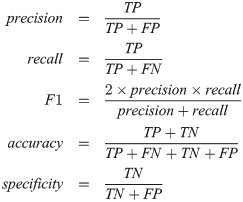

In [50]:
Image('./img/pr.png', width=300)

In [51]:
# metrics for binary classification (accuracy, precision, recall, f1 score)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# accuracy
acc = accuracy_score(y_test, y_pred_hard)
print(f'Accuracy: {acc:.3f}')

# precision
prec = precision_score(y_test, y_pred_hard)
print(f'Precision: {prec:.3f}')

# recall
rec = recall_score(y_test, y_pred_hard)
print(f'Recall: {rec:.3f}')

# f1 score
f1 = f1_score(y_test, y_pred_hard)
print(f'F1 score: {f1:.3f}')

Accuracy: 0.860
Precision: 0.955
Recall: 0.778
F1 score: 0.857


In [52]:
# classification report로 한번에 확인
print(classification_report(y_test, y_pred_hard))

              precision    recall  f1-score   support

         0.0       0.79      0.96      0.86        46
         1.0       0.95      0.78      0.86        54

    accuracy                           0.86       100
   macro avg       0.87      0.87      0.86       100
weighted avg       0.88      0.86      0.86       100



In [53]:
# confusion matrix (binary classification)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_mat = confusion_matrix(y_test, y_pred_hard)
print(conf_mat)

[[44  2]
 [12 42]]


Text(0.5,1,'Confusion matrix')

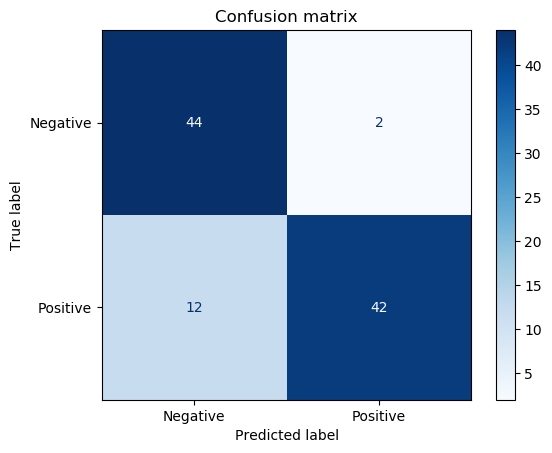

In [54]:
# plot confusion matrix (binary classification)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues')
plt.title('Confusion matrix')

In [55]:
# normalize confusion matrix (binary classification)
conf_mat_norm = confusion_matrix(y_test, y_pred_hard, normalize='true')
print(conf_mat_norm)

[[0.95652174 0.04347826]
 [0.22222222 0.77777778]]


Text(0.5,1,'Normalized confusion matrix')

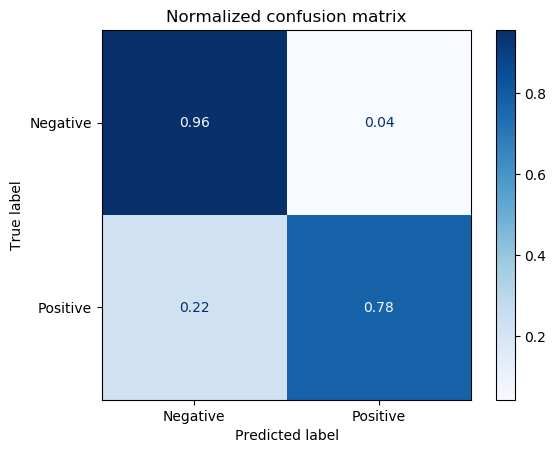

In [56]:
# plot normalize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat_norm, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues', values_format='.2f')
plt.title('Normalized confusion matrix')

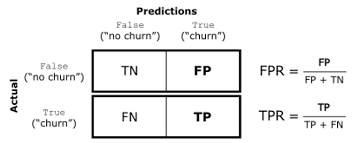

In [57]:
Image('./img/cm.png', width=500)

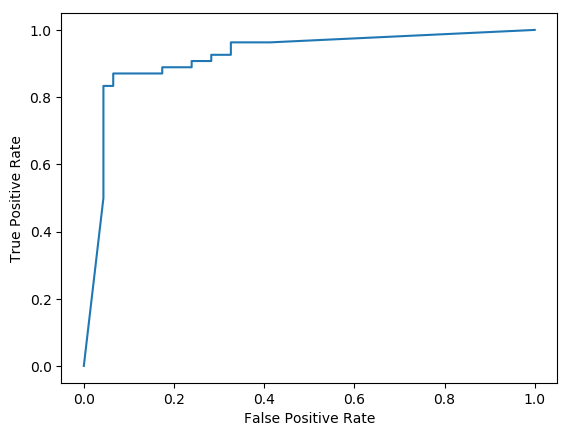

In [58]:
# ROC curve (binary classification)

from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay

# roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot roc curve
disp = RocCurveDisplay(fpr=fpr, tpr=tpr)
disp.plot()

In [59]:
# AUROC (Area Under the ROC Curve)

auroc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC score: {auroc:.3f}')

ROC AUC score: 0.921


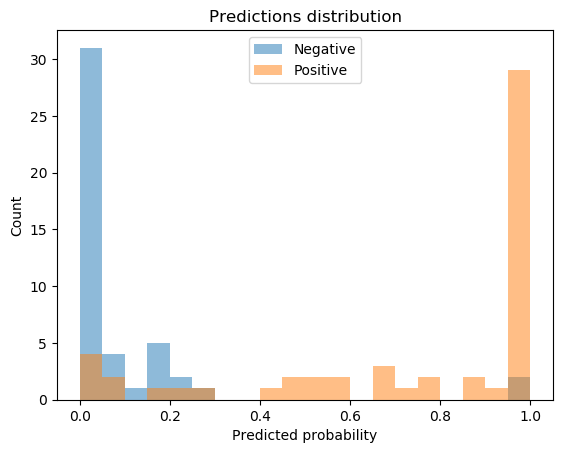

In [60]:
# plot predictions distribution
plt.hist(y_pred[y_test == 0], bins=20, alpha=0.5, label='Negative')
plt.hist(y_pred[y_test == 1], bins=20, alpha=0.5, label='Positive')
plt.xlabel('Predicted probability')
plt.ylabel('Count')
plt.title('Predictions distribution')
plt.legend()
plt.show()

### 다중 분류

In [61]:
# 이미 저장된 예측 결과 로드
y_pred_proba = np.load('./data/iris_pred.npy', allow_pickle=True)
y_test = np.load('./data/iris_true.npy', allow_pickle=True)

In [62]:
# 예측 결과, 실제 타겟 확인 (첫 10개)
y_pred_proba[:10], y_test[:10]

(array([[0.        , 1.        , 0.        ],
        [1.        , 0.        , 0.        ],
        [0.        , 1.        , 0.        ],
        [1.        , 0.        , 0.        ],
        [0.        , 0.        , 1.        ],
        [1.        , 0.        , 0.        ],
        [1.        , 0.        , 0.        ],
        [0.        , 1.        , 0.        ],
        [0.        , 1.        , 0.        ],
        [0.        , 0.33333333, 0.66666667]]),
 array([1, 0, 1, 0, 2, 0, 0, 1, 1, 2], dtype=int64))

In [63]:
# 예측 결과가 확률값, 최종 예측은 확률이 가장 높은 클래스로 결정

In [64]:
# 가장 높은 확률값의 인덱스를 선택
y_pred = np.argmax(y_pred_proba, axis=1)
y_pred[:10]

array([1, 0, 1, 0, 2, 0, 0, 1, 1, 2], dtype=int64)

- micro average: 모든 범주를 합하여 TP, FN 및 FP를 세어 전체적으로 메트릭 계산
   - 다수 범주에 큰 가중치
- macro average: 각 레이블에 대한 메트릭을 계산하고 모두 동일한 가중치로 평균을 계산
   - 소수 범주라도 동일한 가중치

In [65]:
# metrics for multiclass classification (accuracy, precision, recall, f1 score (micro-averaged, macro-averaged))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# accuracy
acc = accuracy_score(y_test, y_pred)
print('Accuracy: {:.3f}'.format(acc))

# precision (micro-averaged, macro-averaged)
prec_micro = precision_score(y_test, y_pred, average='micro')
prec_macro = precision_score(y_test, y_pred, average='macro')
print('Precision (micro): {:.3f}'.format(prec_micro))
print('Precision (macro): {:.3f}'.format(prec_macro))

# recall (micro-averaged, macro-averaged)
rec_micro = recall_score(y_test, y_pred, average='micro')
rec_macro = recall_score(y_test, y_pred, average='macro')
print('Recall (micro): {:.3f}'.format(rec_micro))
print('Recall (macro): {:.3f}'.format(rec_macro))

# f1 score (micro-averaged, macro-averaged)
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_macro = f1_score(y_test, y_pred, average='macro')
print('F1 score (micro): {:.3f}'.format(f1_micro))
print('F1 score (macro): {:.3f}'.format(f1_macro))


Accuracy: 0.933
Precision (micro): 0.933
Precision (macro): 0.944
Recall (micro): 0.933
Recall (macro): 0.933
F1 score (micro): 0.933
F1 score (macro): 0.933


In [66]:
# classification report으로 한번에 확인
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15



In [67]:
# confusion matrix (multiclass classification)
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[5 0 0]
 [0 5 0]
 [0 1 4]]


Text(0.5,1,'Confusion matrix')

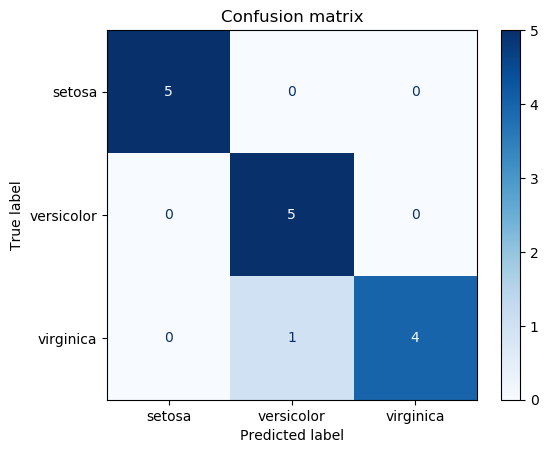

In [68]:
# plot confusion matrix (multiclass classification)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['setosa', 'versicolor', 'virginica'])
disp.plot(cmap='Blues')
plt.title('Confusion matrix')

In [69]:
# normalize confusion matrix (multiclass classification)
conf_mat_norm = confusion_matrix(y_test, y_pred, normalize='true')

Text(0.5,1,'Normalized confusion matrix')

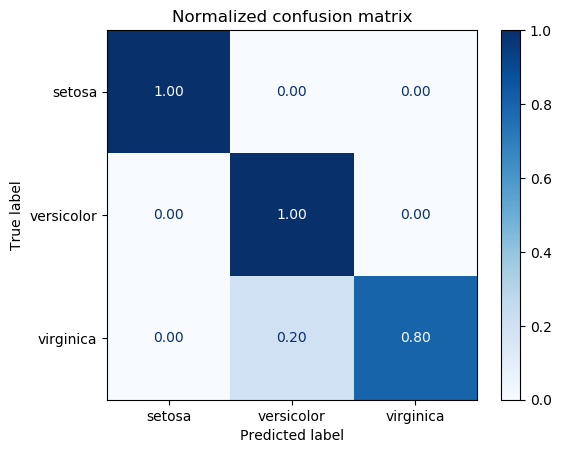

In [70]:
# plot normalize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat_norm, display_labels=['setosa', 'versicolor', 'virginica'])
disp.plot(cmap='Blues', values_format='.2f')
plt.title('Normalized confusion matrix')

## 4-2 회귀

In [71]:
# 이미 저장된 예측 결과 로드
y_test, y_pred = np.load('./data/regression.npy', allow_pickle=True)

In [72]:
# 예측 결과, 실제 타겟 확인 (첫 10개)
y_test[:10], y_pred[:10]

(array([19.92345386, 22.52263778,  0.16053831,  3.69692762, 20.14434565,
        47.48698588, 18.88363874, 22.12159717, 15.96918248, 31.91508687]),
 array([18.71123449, 29.8266158 , -0.43285477,  4.86464479, 19.1896747 ,
        52.34444384, 21.85795311, 20.01854467, 16.94541333, 33.53559248]))

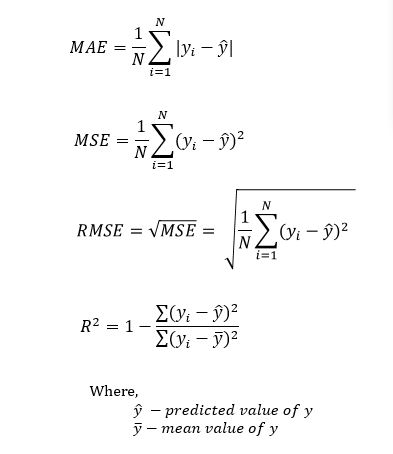

In [73]:
Image('./img/reg.jpg', width=400)

In [74]:
# metrics for regression (mean absolute error, mean squared error, root mean squared error, r2 score)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print('MAE: {:.3f}'.format(mae))

# mean squared error
mse = mean_squared_error(y_test, y_pred)
print('MSE: {:.3f}'.format(mse))

# root mean squared error
rmse = np.sqrt(mse)
print('RMSE: {:.3f}'.format(rmse))

# r2 score
r2 = r2_score(y_test, y_pred)
print('R2: {:.3f}'.format(r2))

MAE: 2.372
MSE: 8.543
RMSE: 2.923
R2: 0.925


[]

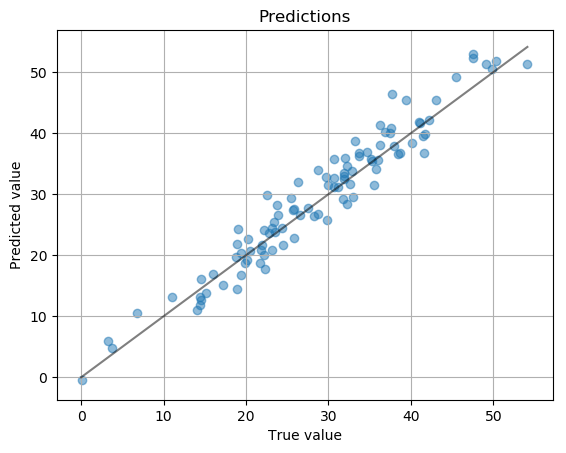

In [75]:
# plot prediction vs true value (scatter plot)
plt.plot([0, np.max(y_test)], [0, np.max(y_test)], 'k', alpha=0.5)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.title('Predictions')
plt.grid()
plt.plot()


[]

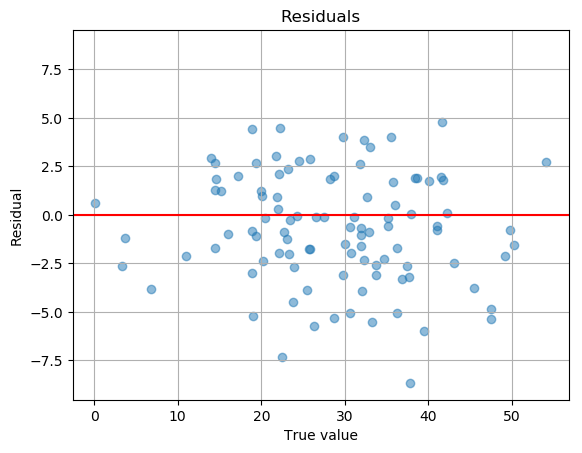

In [76]:
# plot residuals (scatter plot)
plt.scatter(y_test, y_test - y_pred, alpha=0.5)
plt.axhline(0, color='red')
plt.xlabel('True value')
plt.ylabel('Residual')
plt.title('Residuals')
max_range = np.max(np.abs(y_test - y_pred))*1.1
plt.ylim([-max_range, max_range])
plt.grid()
plt.plot()

## Residuals의 분포가 랜덤하게 퍼져있는 것을 확인할 수 있음
## 만약 Residuals의 분포가 특정한 패턴을 가지고 있다면 문제가 있는 것

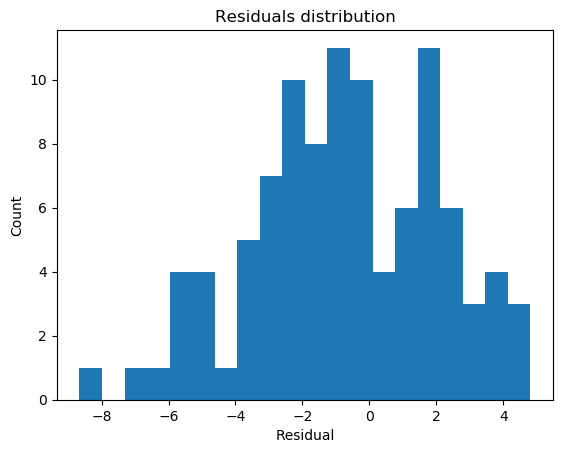

In [77]:
# plot residuals distribution (histogram)
plt.hist(y_test - y_pred, bins=20)
plt.xlabel('Residual')
plt.ylabel('Count')
plt.title('Residuals distribution')
plt.plot()
plt.show()